In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
import warnings
import os
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import auc
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import KFold

warnings.filterwarnings('ignore')

In [2]:
 df = pd.read_csv("bank-additional-full.csv")

In [3]:
print("df shape:", df.shape)
df.head()

df shape: (41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
missing_values = df.isnull().sum()
missing_values

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


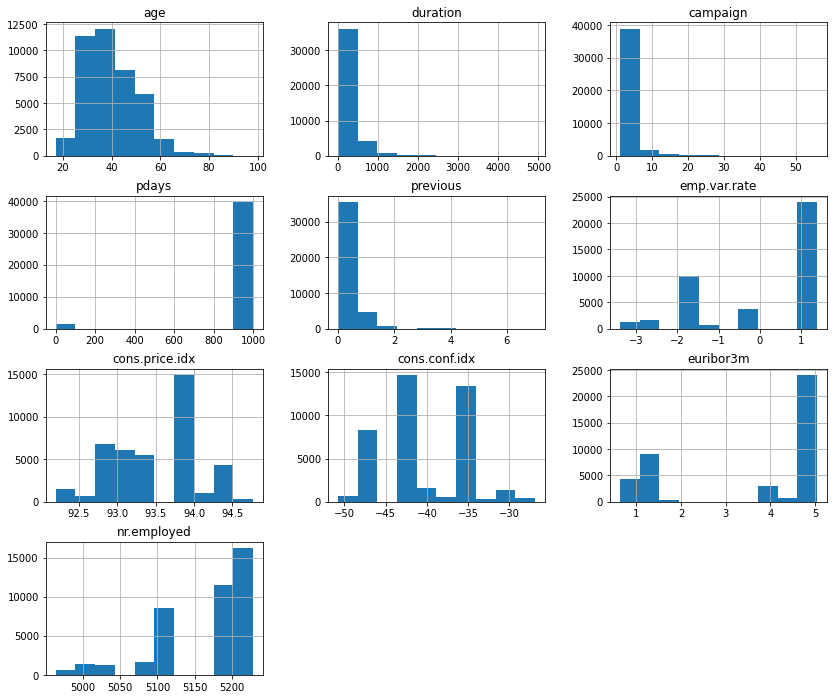

In [6]:
# checking for skewness
df.hist(bins= 10, figsize=(14, 12))
plt.show()

{'age': True, 'duration': True, 'campaign': True, 'pdays': True, 'previous': True, 'emp.var.rate': False, 'cons.price.idx': False, 'cons.conf.idx': True, 'euribor3m': False, 'nr.employed': False},

 Visualization of outlier columns


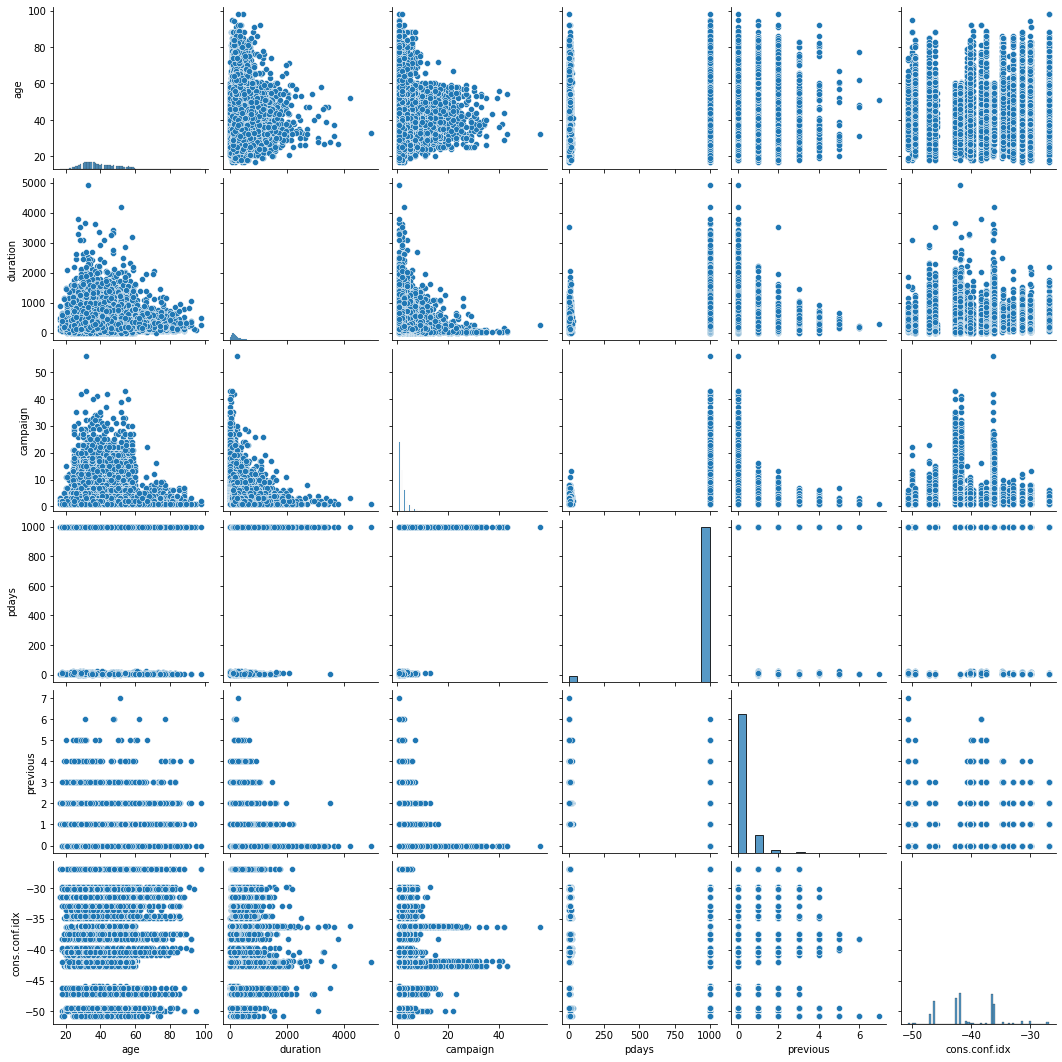

In [7]:
#checking for outliers
def outlier_vars(df, show_plot=True):
    
    outliers = []
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    num_df = df.select_dtypes(include='number')
    result = dict ((((num_df < (Q1 - 1.5 * IQR)) | (num_df > (Q3 + 1.5 * IQR)))==True).any())
    for k,v in result.items():
        if v == True:
            outliers.append(k)
    if show_plot:
        pair_plot = sns.pairplot(df[outliers]);
        print(f'{result},\n\n Visualization of outlier columns')
        return pair_plot
    else:
        return df[outliers]
    
    
outlier_vars(df)

# Exploratory Data Analysis

Distribution of the Target variable

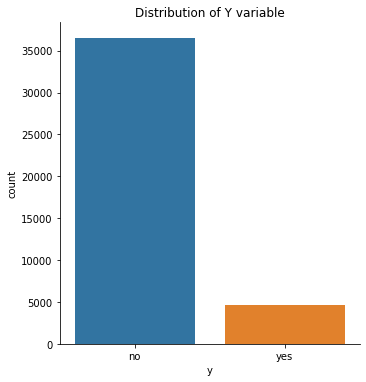

In [8]:
sns.catplot(x ="y",data = df,kind ="count")
plt.title("Distribution of Y variable")
plt.show()

Univariate Analysis

Education

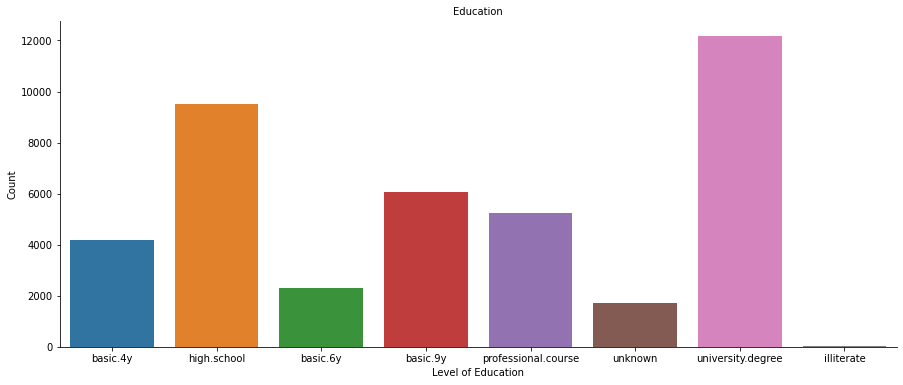

In [9]:
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(ax=ax, x = 'education', data = df)
ax.set_xlabel('Level of Education', fontsize=10)
ax.set_ylabel('Count', fontsize=10)
ax.set_title('Education', fontsize=10)
ax.tick_params(labelsize=10)
sns.despine()

Marital

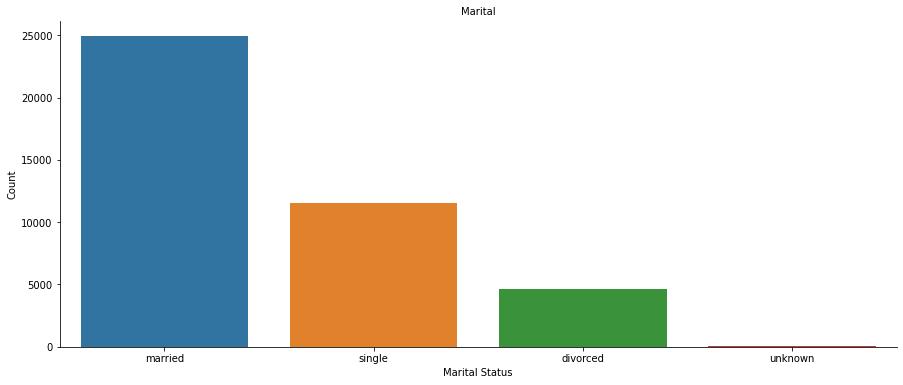

In [10]:
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(ax=ax, x = 'marital', data = df)
ax.set_xlabel('Marital Status', fontsize=10)
ax.set_ylabel('Count', fontsize=10)
ax.set_title('Marital', fontsize=10)
ax.tick_params(labelsize=10)
sns.despine()

Contact

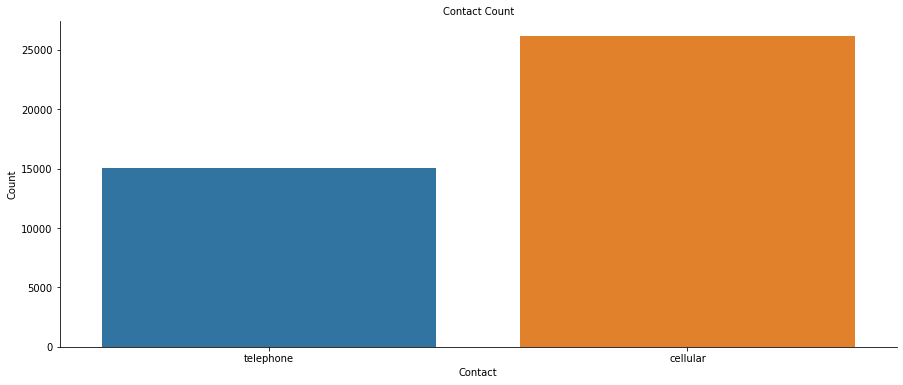

In [11]:
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(ax=ax, x = 'contact', data = df)
ax.set_xlabel('Contact', fontsize=10)
ax.set_ylabel('Count', fontsize=10)
ax.set_title('Contact Count', fontsize=10)
ax.tick_params(labelsize=10)
sns.despine()

Day of the Week, Month

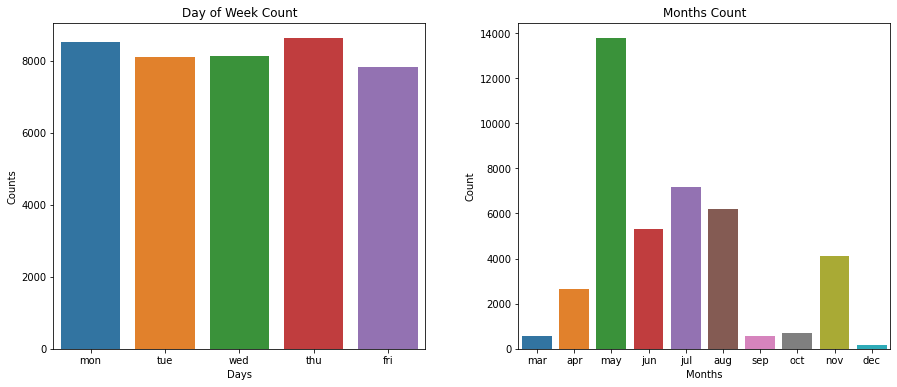

In [12]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,6))
sns.countplot(df['day_of_week'], ax = ax1)
ax1.set_xlabel('Days', fontsize = 10)
ax1.set_ylabel('Counts', fontsize = 10)
ax1.set_title('Day of Week Count')
ax1.tick_params(labelsize=10)

sns.countplot(df['month'], ax = ax2, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax2.set_xlabel('Months', fontsize = 10)
ax2.set_ylabel('Count')
ax2.set_title('Months Count')
ax2.tick_params(labelsize=10)


plt.subplots_adjust(wspace=0.25)

Loan, Housing, Default Status

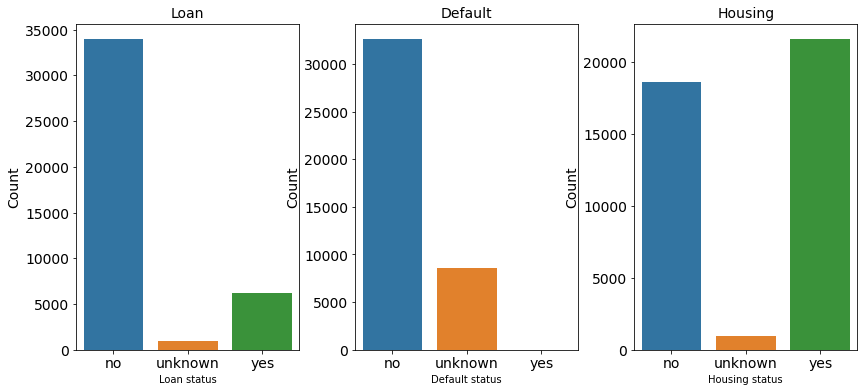

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (14,6))
sns.countplot(x = 'loan', data = df, ax = ax1, order = ['no', 'unknown', 'yes'])
ax1.set_title('Loan', fontsize=14)
ax1.set_xlabel('Loan status')
ax1.set_ylabel('Count', fontsize=14)
ax1.tick_params(labelsize=14)

sns.countplot(x = 'default', data = df, ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_title('Default', fontsize=14)
ax2.set_xlabel('Default status')
ax2.set_ylabel('Count', fontsize=14)
ax2.tick_params(labelsize=14)

sns.countplot(x = 'housing', data = df, ax = ax3, order = ['no', 'unknown', 'yes'])
ax3.set_title('Housing', fontsize=14)
ax3.set_xlabel('Housing status')
ax3.set_ylabel('Count', fontsize=14)
ax3.tick_params(labelsize=14)

plt.subplots_adjust(wspace=0.25)

Job

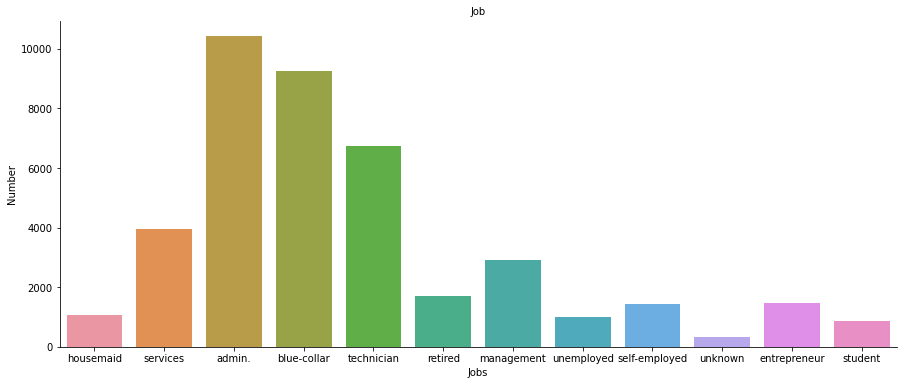

In [14]:
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(ax=ax, x = 'job', data = df)
ax.set_xlabel('Jobs', fontsize=10)
ax.set_ylabel('Number', fontsize=10)
ax.set_title('Job', fontsize=10)
ax.tick_params(labelsize=10)
sns.despine()

Poutcome

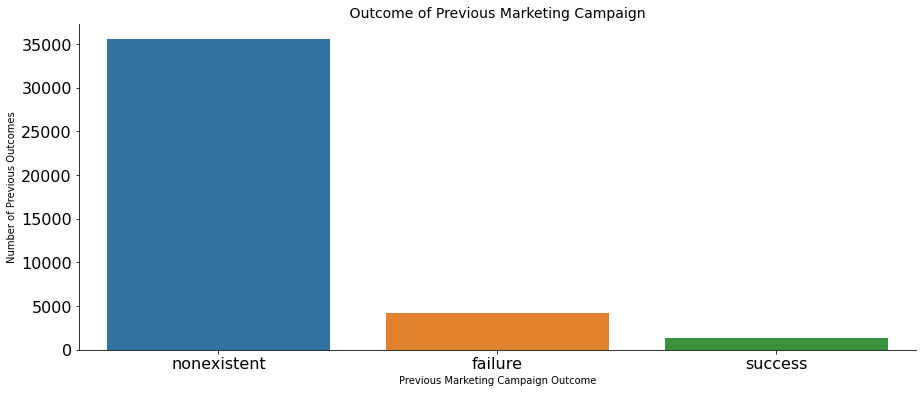

In [15]:
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(ax=ax, x = 'poutcome', data = df)
ax.set_xlabel('Previous Marketing Campaign Outcome', fontsize=10)
ax.set_ylabel('Number of Previous Outcomes', fontsize=10)
ax.set_title(' Outcome of Previous Marketing Campaign ', fontsize=14)
ax.tick_params(labelsize=16)
sns.despine()

Age

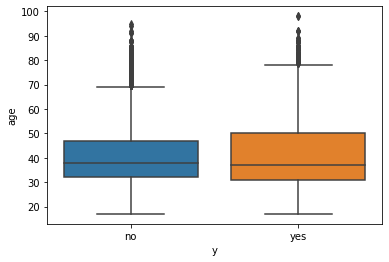

In [16]:
sns.boxplot(data=df, x="y", y="age")
plt.show()

<AxesSubplot:xlabel='age', ylabel='Density'>

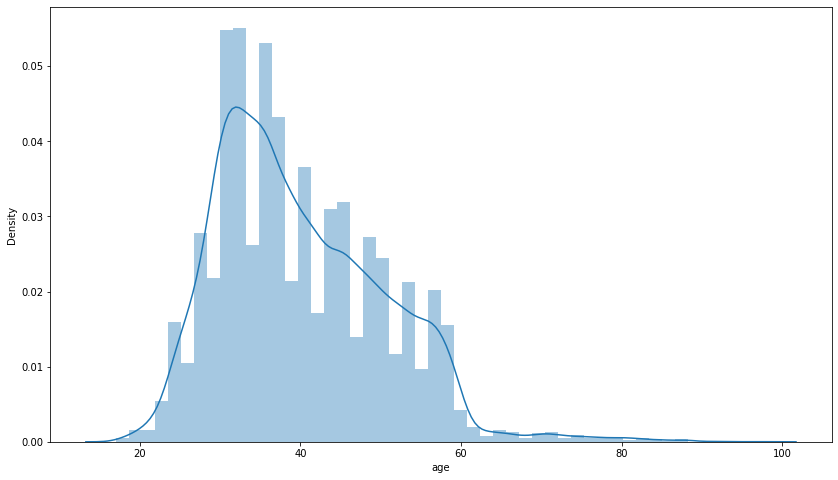

In [17]:
plt.figure(figsize=(14,8))
sns.distplot(df["age"])

Campaign

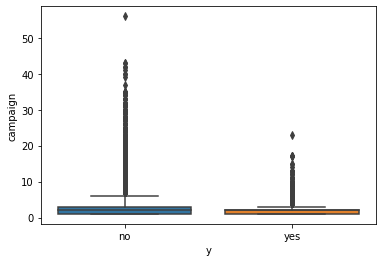

In [18]:
sns.boxplot(data=df, x="y", y="campaign")
plt.show()

<AxesSubplot:xlabel='campaign', ylabel='Density'>

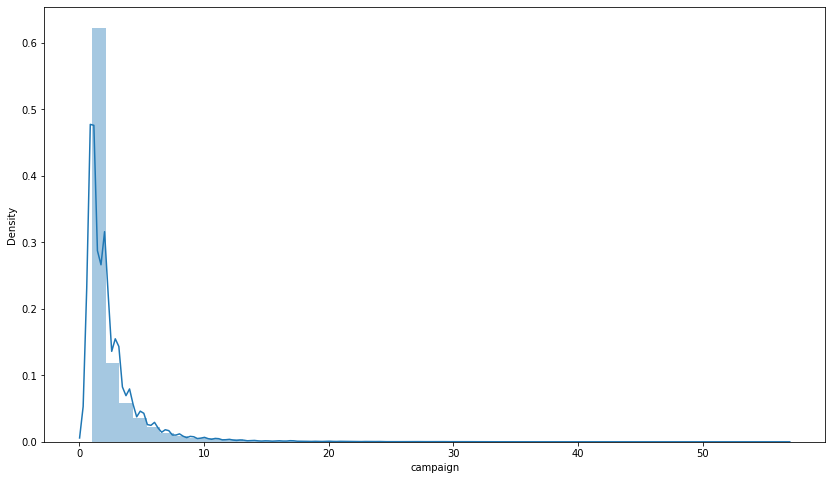

In [19]:
plt.figure(figsize=(14,8))
sns.distplot(df["campaign"])

emp.var.rate

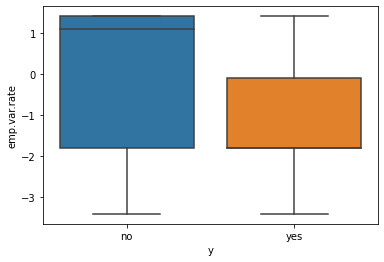

In [20]:
sns.boxplot(data=df, x="y", y="emp.var.rate")
plt.show()

<AxesSubplot:xlabel='emp.var.rate', ylabel='Density'>

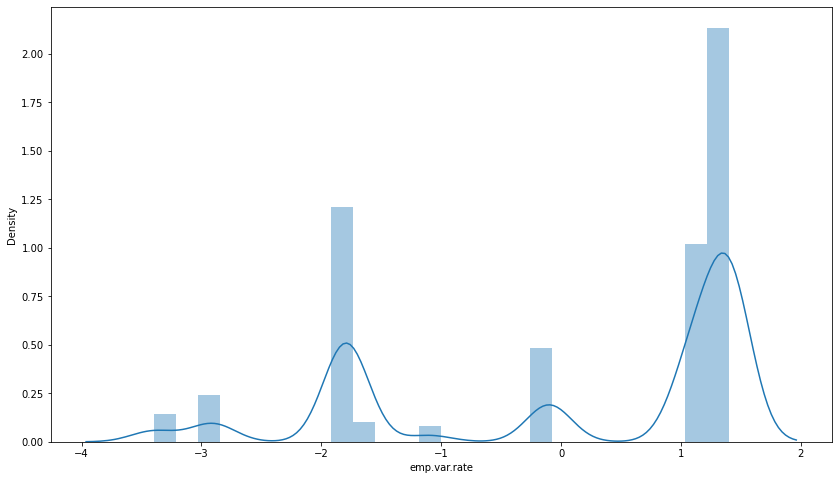

In [21]:
plt.figure(figsize=(14,8))
sns.distplot(df["emp.var.rate"])

nr.employed

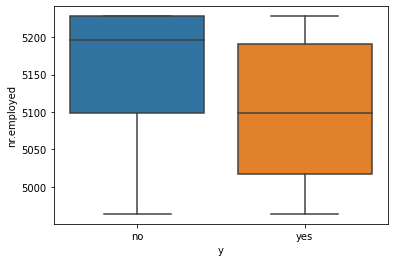

In [22]:
sns.boxplot(data=df, x="y", y="nr.employed")
plt.show()

<AxesSubplot:xlabel='nr.employed', ylabel='Density'>

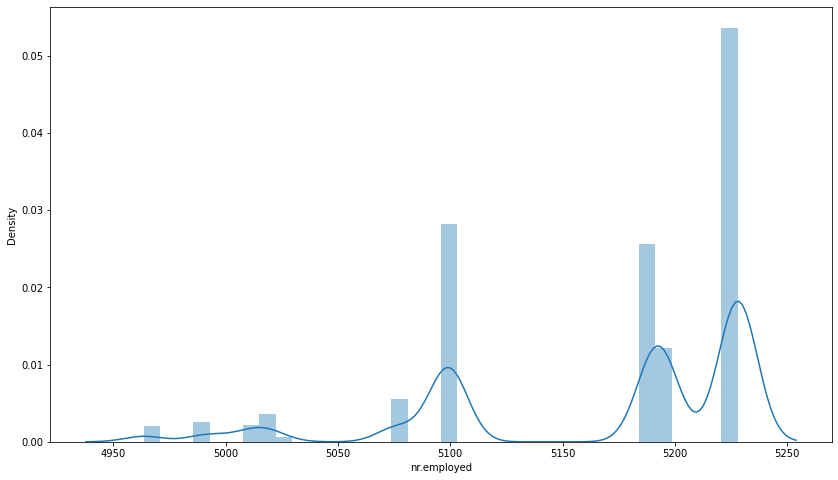

In [23]:
plt.figure(figsize=(14,8))
sns.distplot(df["nr.employed"])

cons.price.idx

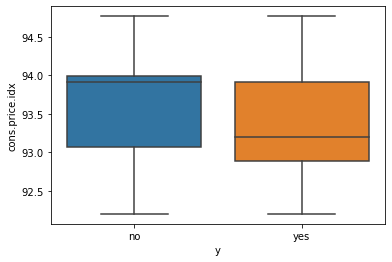

In [24]:
sns.boxplot(data=df, x="y", y="cons.price.idx")
plt.show()

<AxesSubplot:xlabel='cons.price.idx', ylabel='Density'>

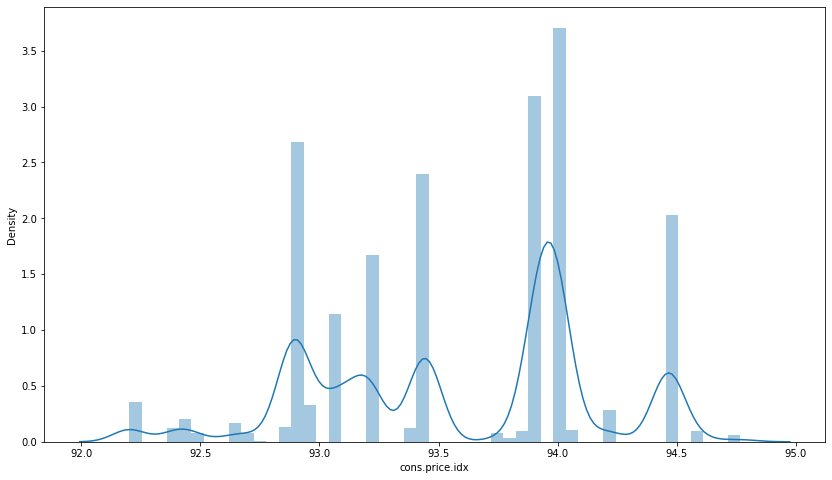

In [25]:
plt.figure(figsize=(14,8))
sns.distplot(df["cons.price.idx"])

Bivariate Analysis

In [26]:
def plotting_kd(data,columns,hue=None):
    if hue==None:    
       plot=sns.FacetGrid(df,size=15).map(sns.distplot,columns)
    else:
       plot=sns.FacetGrid(df,hue=hue,size=10).map(sns.distplot,columns)
       plt.legend()

Age and Target Variable

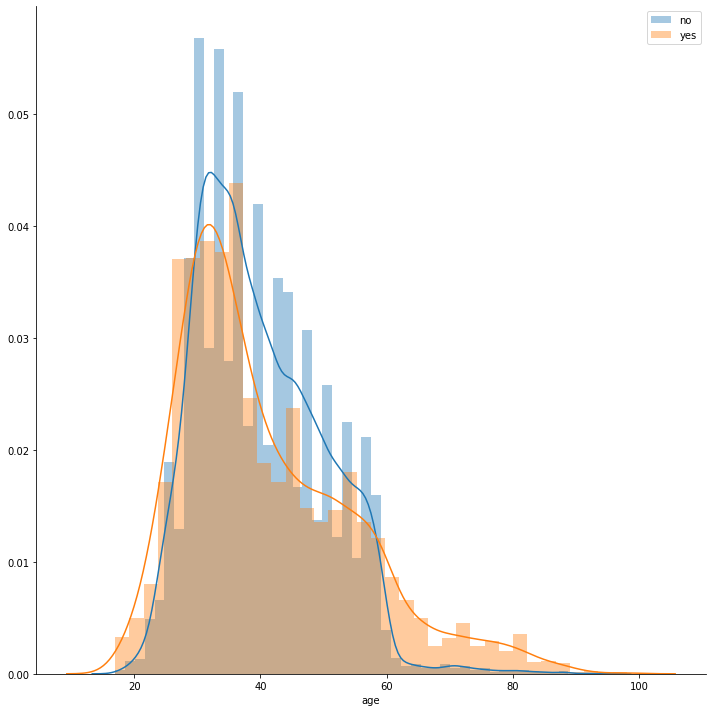

In [27]:
plotting_kd(df,'age',hue='y')

Campaign and Target Variable

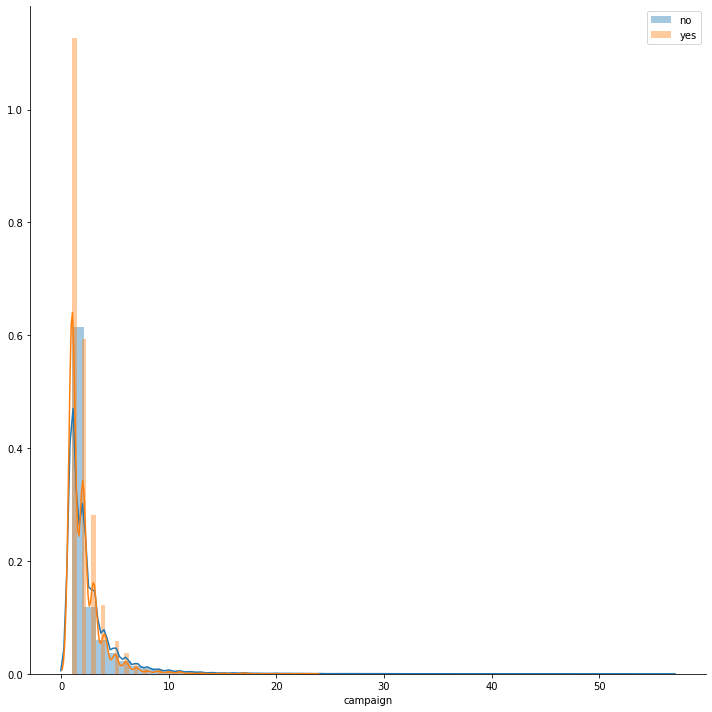

In [28]:
plotting_kd(df,'campaign',hue='y')

Duration and Target Variable

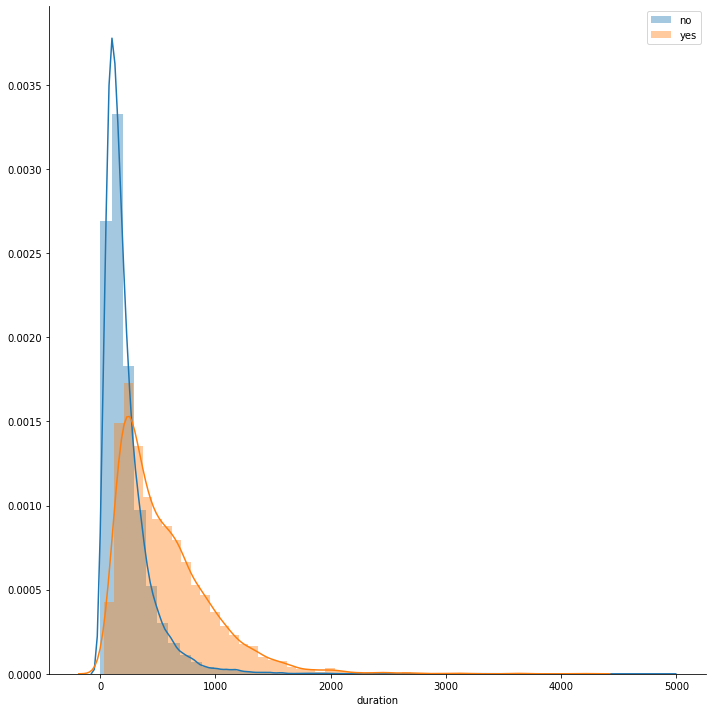

In [29]:
plotting_kd(df,'duration',hue='y')

Pdays and Target Variable

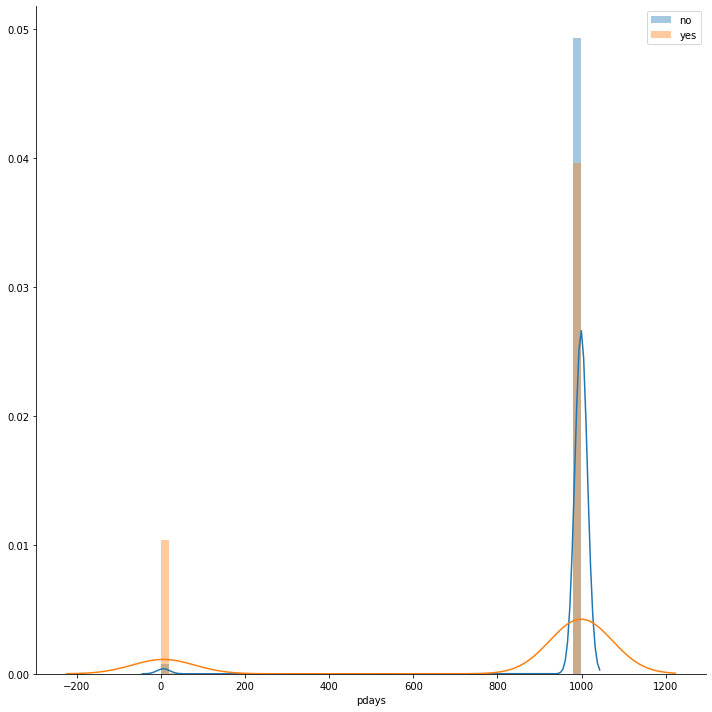

In [30]:
plotting_kd(df, 'pdays',hue='y')

Euribor3m and Target Variable

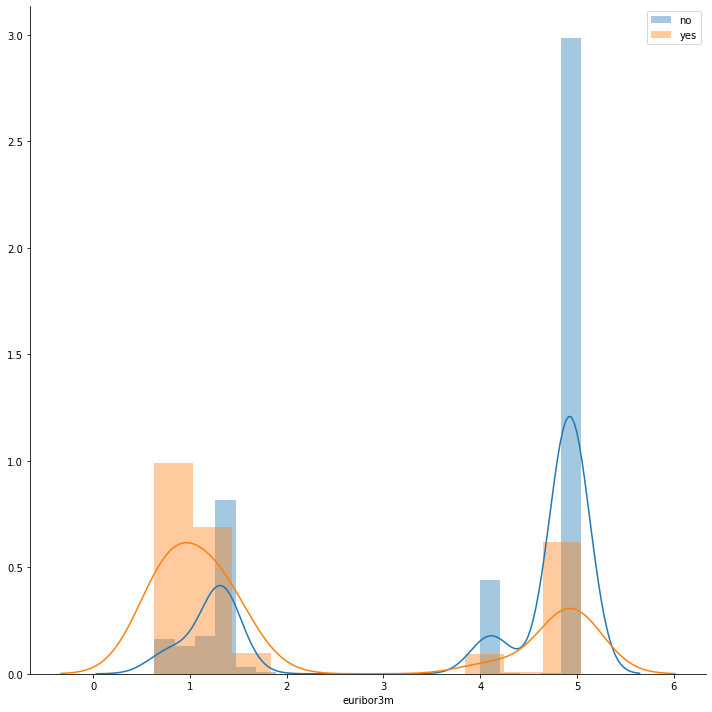

In [31]:
plotting_kd(df,'euribor3m',hue='y')

Nr.employed and Target Variable

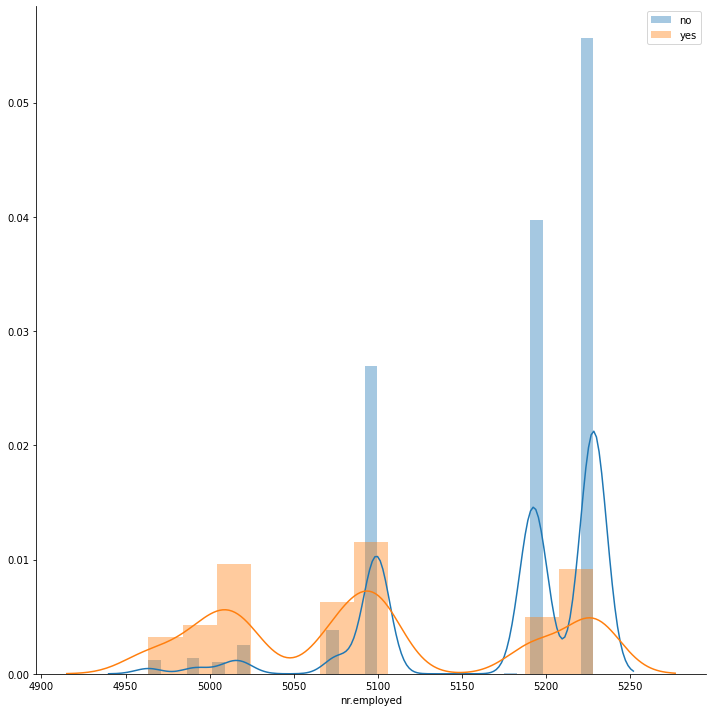

In [32]:
plotting_kd(df,'nr.employed',hue='y')

Cons.conf.idx

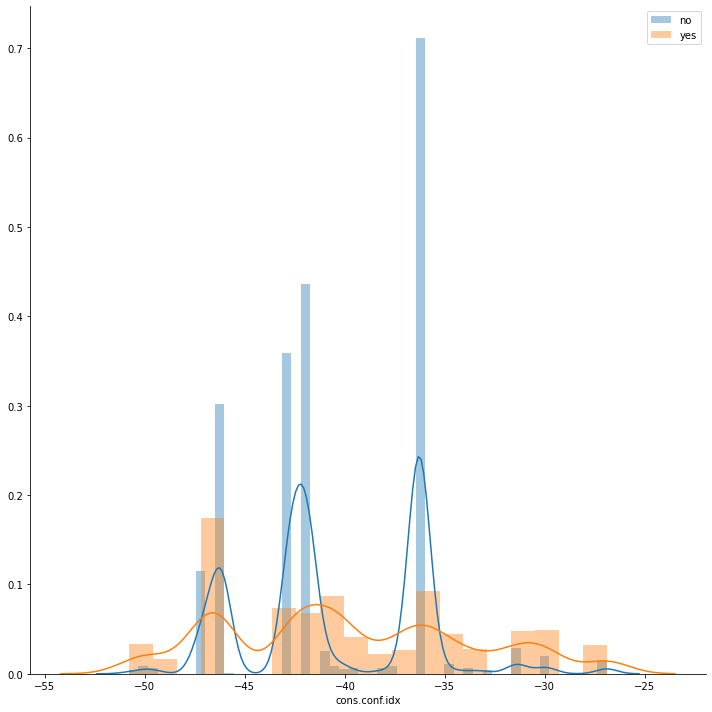

In [33]:
plotting_kd(df,'cons.conf.idx',hue='y')

Cons.price.idx and Target variable

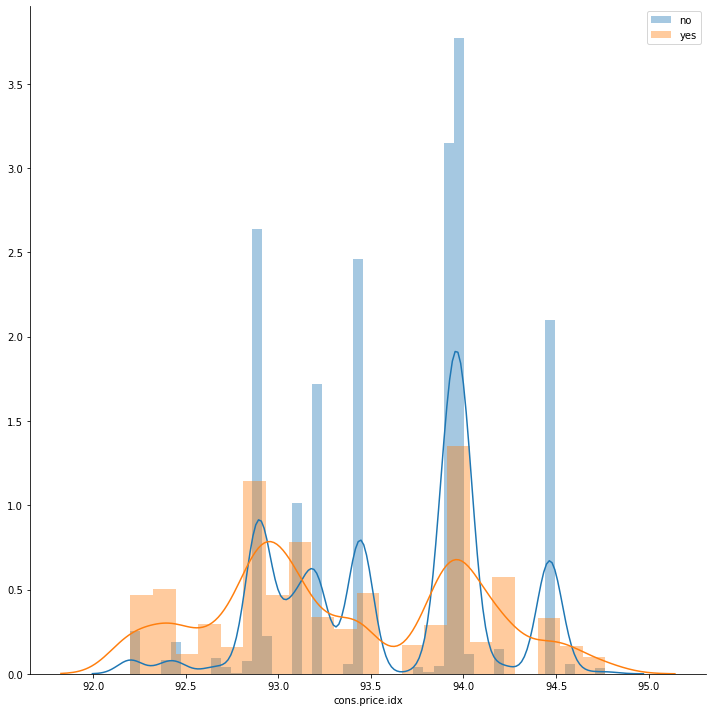

In [34]:
plotting_kd(df,'cons.price.idx', hue='y')

Emp.var.rate and Target Variable

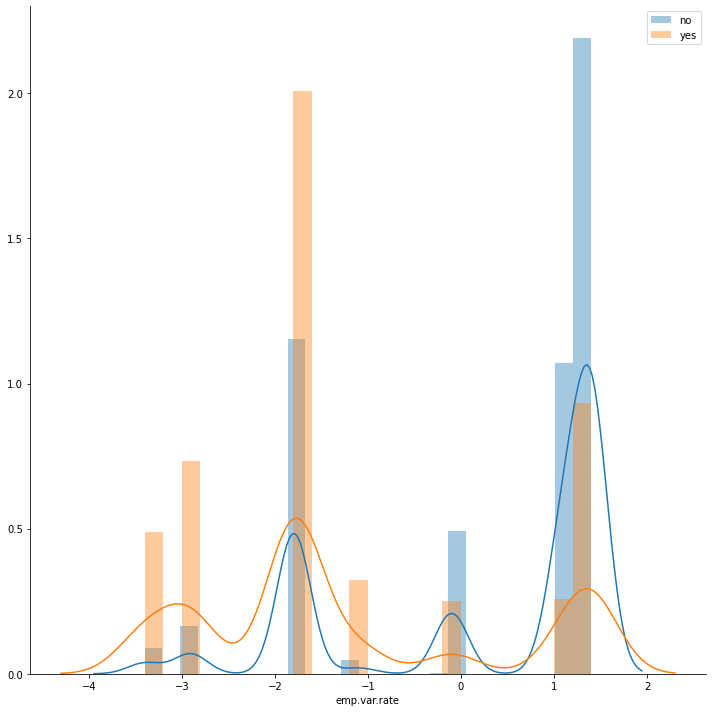

In [35]:
plotting_kd(df,'emp.var.rate',hue='y')

Marital and Target Variable

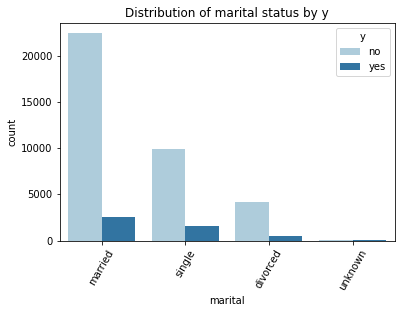

In [36]:
sns.countplot(x="marital",hue="y", data=df,palette=sns.color_palette("Paired", n_colors=2)).set_title("Distribution of marital status by y")
plt.xticks(rotation = 60)
plt.show()

Job and Target Variable

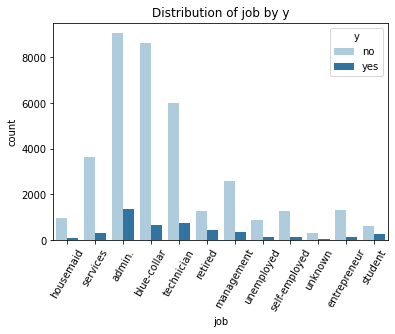

In [37]:
sns.countplot(x="job",hue="y", data=df,palette=sns.color_palette("Paired", n_colors=2)).set_title("Distribution of job by y")
plt.xticks(rotation = 60)
plt.show()

Education and Target Variable

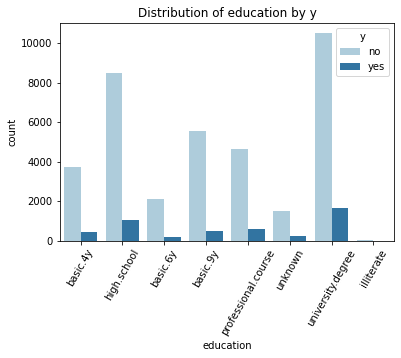

In [38]:
sns.countplot(x="education",hue="y", data=df,palette=sns.color_palette("Paired", n_colors=2)).set_title("Distribution of education by y")
plt.xticks(rotation = 60)
plt.show()

Contact and Target Variable

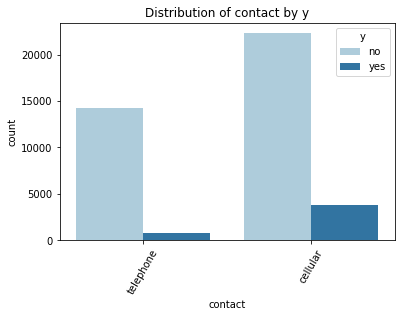

In [39]:
sns.countplot(x="contact",hue="y", data=df,palette=sns.color_palette("Paired", n_colors=2)).set_title("Distribution of contact by y")
plt.xticks(rotation = 60)
plt.show()

Loan and Target Variable

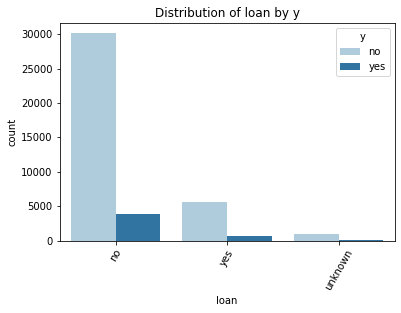

In [40]:
sns.countplot(x="loan",hue="y", data=df,palette=sns.color_palette("Paired", n_colors=2)).set_title("Distribution of loan by y")
plt.xticks(rotation = 60)
plt.show()

Day of the week and Target Variable

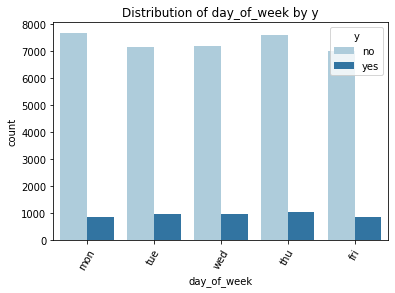

In [41]:
sns.countplot(x="day_of_week",hue="y", data=df,palette=sns.color_palette("Paired", n_colors=2)).set_title("Distribution of day_of_week by y")
plt.xticks(rotation = 60)
plt.show()

Month and Target Variable

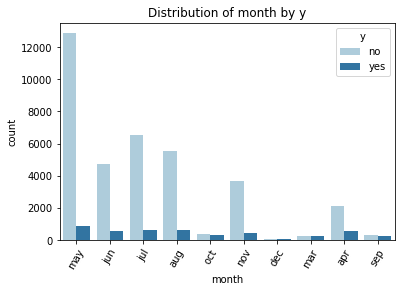

In [42]:
sns.countplot(x="month",hue="y", data=df,palette=sns.color_palette("Paired", n_colors=2)).set_title("Distribution of month by y")
plt.xticks(rotation = 60)
plt.show()

Correlation Matrix

<AxesSubplot:>

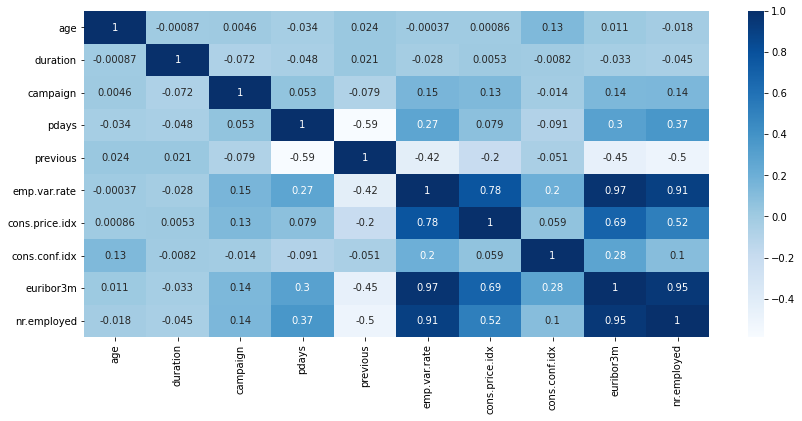

In [43]:
fig, ax = plt.subplots(figsize=(14,6))
sns.heatmap(df.corr(), annot=True,cmap='Blues',ax=ax)

Data Cleaning

In [44]:
df.drop(columns="duration", inplace=True)

In [45]:
df['education'].replace({'basic.9y':'basic','basic.4y':'basic','basic.6y':'basic','unknown':'illiterate'},inplace=True)
df['job'].replace({'self-employed':'entrepreneur'},inplace=True)

In [46]:
df['education'].value_counts()

basic                  12513
university.degree      12168
high.school             9515
professional.course     5243
illiterate              1749
Name: education, dtype: int64

In [47]:
df['job'].value_counts()

admin.          10422
blue-collar      9254
technician       6743
services         3969
management       2924
entrepreneur     2877
retired          1720
housemaid        1060
unemployed       1014
student           875
unknown           330
Name: job, dtype: int64

In [48]:
df['deposit_subscription']=np.where(df.y=='yes',1,0)

In [49]:
df=df.drop(['y'],axis=1)

In [50]:
df= pd.get_dummies(df,columns=['job','marital','education','default','housing','loan','contact','day_of_week','poutcome','month'])

In [51]:
columns = [column for column in df.columns if column != 'deposit_subscription']
columns = ['deposit_subscription'] + columns 
df = df[columns]

In [52]:
numerical_columns =['age','pdays','emp.var.rate','cons.price.idx','euribor3m','nr.employed','cons.conf.idx']

In [53]:
scaler =StandardScaler()
df[numerical_columns]=scaler.fit_transform(df[numerical_columns])

In [54]:
print("df shape: ", df.shape)
df.head()

df shape:  (41188, 59)


,deposit_subscription,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,0,1.533034,1,0.195414,0,0.648092,0.722722,0.886447,0.71246,0.33168,...,0,0,0,0,0,0,1,0,0,0
1,0,1.628993,1,0.195414,0,0.648092,0.722722,0.886447,0.71246,0.33168,...,0,0,0,0,0,0,1,0,0,0
2,0,-0.290186,1,0.195414,0,0.648092,0.722722,0.886447,0.71246,0.33168,...,0,0,0,0,0,0,1,0,0,0
3,0,-0.002309,1,0.195414,0,0.648092,0.722722,0.886447,0.71246,0.33168,...,0,0,0,0,0,0,1,0,0,0
4,0,1.533034,1,0.195414,0,0.648092,0.722722,0.886447,0.71246,0.33168,...,0,0,0,0,0,0,1,0,0,0


In [55]:
#removing outliers
columns = df.columns.tolist()
columns= [c for c in columns if c not in['deposit_subscription']]
target='deposit_subscription'
state = np.random.RandomState(42)
X=df[columns]
y=df[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
print(X.shape)
print(y.shape)

(41188, 58)
(41188,)


In [56]:
# defining the random sampler function
ROS = RandomOverSampler(random_state=42)
X_train_res, y_train_res = ROS.fit_resample(X, y)


In [57]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

After OverSampling, the shape of train_X: (73096, 58)
After OverSampling, the shape of train_y: (73096,) 



In [58]:
pca = PCA(n_components = 10)
pca.fit(X_train_res)
X = pca.transform(X_train_res)

In [59]:
principal_df = pd.DataFrame(data = X, columns = ['PC_1', 'PC_2','PC_3', 'PC_4','PC_5','PC_6', 'PC_7', 'PC_8', 'PC_9','PC_10'])
principal_df

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10
0,0.276952,-2.230390,1.150139,1.734078,0.584310,0.719201,0.792355,0.372997,-0.398632,-0.109114
1,0.325383,-2.277034,1.198150,1.756275,0.585514,0.716951,0.773738,0.332077,-0.498132,0.037529
2,0.305623,-2.285808,0.962703,0.331222,-0.654704,0.693774,-0.564318,0.761759,-0.321722,-0.433552
3,0.313300,-2.287627,1.025344,0.619064,-0.431400,0.810637,0.777823,0.351300,-0.387476,-0.578444
4,0.271695,-2.218908,1.137036,1.606778,0.457466,0.723370,0.585604,0.023440,-0.595569,-0.159589
...,...,...,...,...,...,...,...,...,...,...
73091,-1.469730,-0.583999,-1.701791,-1.001198,0.649577,-0.461762,0.047441,1.812824,0.077142,-0.187699
73092,-1.917454,-0.030901,-1.205776,0.121546,-1.059987,1.827100,-0.470096,1.108231,-0.062498,-0.411915
73093,-1.771850,-0.215546,-1.600661,-1.517695,0.324509,-0.196691,1.149895,0.607756,0.769098,0.755645
73094,-0.834298,0.271174,-1.564454,0.495119,2.249354,-0.581458,-0.744838,-0.380054,-0.567040,-0.255914


In [60]:
print('Explained variation in pca: {}'.format(pca.explained_variance_ratio_))

Explained variation in pca: [0.29397836 0.20062126 0.10630713 0.0727688  0.05776813 0.0334947
 0.0217165  0.02009097 0.01499945 0.01427501]


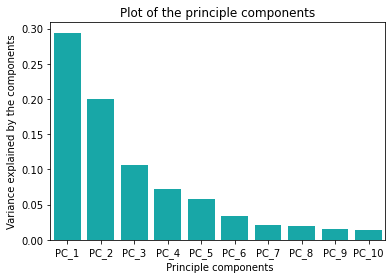

In [61]:
df1 = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC_1', 'PC_2','PC_3', 'PC_4','PC_5','PC_6', 'PC_7',
                          'PC_8', 'PC_9','PC_10']})
sns.barplot(x='PC',y="var", 
           data=df1, color="c")
plt.xlabel(" Principle components")
plt.ylabel("Variance explained by the components")
plt.title("Plot of the principle components")
plt.show()

In [62]:
processed_data_path = os.path.join(os.path.pardir, '/Users/Acer','jupyterPro')
write_train_path = os.path.join(processed_data_path, 'train.csv')
write_test_path = os.path.join(processed_data_path, 'test.csv')

# train data
principal_df.to_csv(write_train_path,index = False)
#test data
y_train_res.to_csv(write_test_path,index = False)